<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/notebooks/sensitivity/SensitivityAnalysisOcimAndOmpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Based on the original sensitivity analysis notebook at
# https://github.com/nitrogenlab/GP15_watermassanalysis/blob/5d0420ae4b8a4689a8cee98e36876e8ed2cb8c68/GP15analysis_sensitivityanalysis.ipynb

#Install pyompa
!pip uninstall -y pyompa
%cd /content/
!rm -rf pyompa
!git clone https://github.com/nitrogenlab/pyompa
%cd /content/pyompa
!git checkout main
!git log -1
!pip install .
%cd /content/

/content
Cloning into 'pyompa'...
remote: Enumerating objects: 1439, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 1439 (delta 166), reused 99 (delta 99), pack-reused 1262 (from 2)
Receiving objects: 100% (1439/1439), 18.39 MiB | 45.48 MiB/s, done.
Resolving deltas: 100% (1009/1009), done.
/content/pyompa
Already on 'main'
Your branch is up to date with 'origin/main'.
commit 665d16d4578d6206e0784bdddfe1fe230c54be13 (HEAD -> main, origin/main, origin/HEAD)
Merge: cb636c3 8cacca6
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Thu Jul 17 13:22:18 2025 +1000

    Merge pull request #12 from nitrogenlab/AvantiShri-patch-1
    
    Update README.md
Processing /content/pyompa
  Preparing metadata (setup.py) ... done
  Created wheel for pyompa: filename=pyompa-0.4.2.1-py3-none-any.whl size=27935 sha256=ffd6ed358e19e971b387db7ec36143f310ea96b3174afbc5b32bd60c47f40344
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [2]:
#Install gp15wmascripts
!pip uninstall -y gp15wma
%cd /content/
!rm -rf gp15wmascripts
!git clone https://github.com/nitrogenlab/gp15wmascripts
%cd /content/gp15wmascripts
!git checkout main
!git log -1
!pip install .
%cd /content/

/content
Cloning into 'gp15wmascripts'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 368 (delta 90), reused 3 (delta 3), pack-reused 226 (from 1)
Receiving objects: 100% (368/368), 16.59 MiB | 28.31 MiB/s, done.
Resolving deltas: 100% (214/214), done.
/content/gp15wmascripts
Already on 'main'
Your branch is up to date with 'origin/main'.
commit 8d4822dba6260752d5e710914d0d407de2b19607 (HEAD -> main, origin/main, origin/HEAD)
Author: rml54 <45828236+rml54@users.noreply.github.com>
Date:   Mon Sep 4 12:05:51 2023 -0400

    Update settingdefaults.py
    
    remove nitrate
Processing /content/gp15wmascripts
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.6 MB/s eta 0:00:00
  Created wheel for gp15wma: filename=gp15wma-0.1.0.0-py3-none-any.whl size=15446 sha256=2ccff6bf196625f7f950422c6e6b6228a2cc0828eb66a2047efdaee9f26a030a
  Sto

In [3]:
import pyompa
import gp15wma

In [4]:
gp15_df, gp15_intermediateanddeep, gp15_thermocline = gp15wma.download_and_load_gp15_data(
    station_to_tc_cutoffs_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/station_to_tc_cutoffs.json")

bottle flag BTLNBR_FLAG_W BTLNBR_FLAG_W
uint8
leg1 nans 0
leg2 nans 0
CTD salinity flag CTDSAL_FLAG_W CTDSAL_FLAG_W
uint8
leg1 nans 0
leg2 nans 0
bottle oxygen flag Flag_OXYGEN_D_CONC_BOTTLE_qizf9x Flag_OXYGEN_D_CONC_BOTTLE_n41f8b
uint8
leg1 nans 0
leg2 nans 0
silicate flag Flag_SILICATE_D_CONC_BOTTLE_l9fh07 Flag_SILICATE_D_CONC_BOTTLE_3fot83
uint8
leg1 nans 0
leg2 nans 0
nitrate flag Flag_NITRATE_D_CONC_BOTTLE_xhgtuv Flag_NITRATE_D_CONC_BOTTLE_bugat8
uint8
leg1 nans 0
leg2 nans 0
phosphate flag Flag_PHOSPHATE_D_CONC_BOTTLE_lof4ap Flag_PHOSPHATE_D_CONC_BOTTLE_d0rgav
uint8
leg1 nans 0
leg2 nans 0
CTD pressure CTDPRS CTDPRS
float64
leg1 nans 487
leg2 nans 492
CTD temperature CTDTMP CTDTMP
float64
leg1 nans 487
leg2 nans 492
practical_salinity CTDSAL CTDSAL
float64
leg1 nans 487
leg2 nans 492
lat LATITUDE LATITUDE
float64
leg1 nans 476
leg2 nans 484
lon LONGITUDE LONGITUDE
float64
leg1 nans 476
leg2 nans 484
stnnbr STNNBR STNNBR
<U12
leg1 and leg2 arrays are strings.
geotrc_ID GEOTRC_SAMP

In [5]:
interanddeep_endmember_df = gp15wma.load_interanddeep_endmember_df(
    df_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv",
    df_file_name="GP15_intermediateanddeep.csv")


In [6]:
interanddeep_endmember_df

,watermass_name,conservative_temp,absolute_salinity,silicate,nitrate,phosphate,oxygen,latitude,longitude,PO,NO,SiO
0,AABW_0,0.071010,34.874306,128.232648,32.464573,2.256264,216.226644,-63.780499,-119.014188,565.947599,530.483711,2139.716361
1,AAIW_0,5.041524,34.387770,11.507361,23.991849,1.670313,272.309846,-52.777285,-85.089895,531.208332,504.550945,444.920262
2,AAIW_1,4.472442,34.404032,20.434864,28.544062,1.994464,231.454546,-50.717771,-86.192849,540.596412,507.761071,537.977505
3,ENPCW_0,15.987926,34.795953,3.538626,3.510966,0.320541,213.720180,24.481807,-151.785940,263.404069,247.706334,266.799569
4,ENPCW_1,8.553011,34.203434,28.661457,21.545892,1.568647,177.507909,25.189481,-150.783807,420.648191,386.072142,607.429770
5,EqIW_0,5.457477,34.733055,72.170881,42.522378,3.056619,42.817594,-3.463370,-85.834079,516.593531,454.434213,1125.380808
6,EqIW_1,8.738920,34.843496,44.153200,38.849223,2.845376,8.044958,-1.594136,-85.834445,449.078254,384.105437,670.342956
7,LCDW_0,1.549640,34.904359,93.312283,31.500983,2.181685,190.095497,-64.060684,-143.667295,528.256602,495.025015,1589.779742
8,LCDW_1,0.766669,34.885135,119.824941,32.425683,2.258798,199.089300,-65.264165,-119.820826,549.203027,512.969913,1996.463422
9,NPIW_0,9.413380,34.342944,32.630000,19.840000,1.410000,177.000000,37.029000,149.660000,395.550000,369.051200,666.450000


In [7]:
#!wget raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/ocimandompa/endmemname_to_ocimfracs.npy -O endmemname_to_ocimfracs.npy # this one doesn't have ESSW? Rian committed it
!wget raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/e24b075/ocimandompa/endmemname_to_ocimfracs.npy -O endmemname_to_ocimfracs.npy

URL transformed to HTTPS due to an HSTS policy
--2025-07-22 04:15:15--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/e24b075/ocimandompa/endmemname_to_ocimfracs.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66413 (65K) [application/octet-stream]
Saving to: ‘endmemname_to_ocimfracs.npy’

endmemname_to_ocimf 100%[===================>]  64.86K  --.-KB/s    in 0.002s  

2025-07-22 04:15:15 (33.8 MB/s) - ‘endmemname_to_ocimfracs.npy’ saved [66413/66413]



In [9]:
import numpy as np
endmemname_to_ocimfracs = np.load("endmemname_to_ocimfracs.npy", allow_pickle=True).item()
endmemname_to_ocimfracs.keys()

dict_keys(['AABW', 'AAIW', 'ENPCW', 'ESSW', 'EqIW', 'LCDW', 'NPIW', 'PDW', 'PSUW', 'SPCW', 'UCDW', '_ALL'])

In [10]:
from pyompa import OMPAProblem
from pyompa.ompacore import ExportToCsvMixin
from collections import namedtuple, OrderedDict
import numpy as np


class OcimAndOmpaSensitivityAnalysis(object):

    def __init__(self, static_ompa_arguments, endmemname_to_ocimfracs, max_resids):
        self.static_ompa_arguments = static_ompa_arguments
        self.endmemname_to_ocimfracs = endmemname_to_ocimfracs
        self.max_resids = max_resids

    def run(self, varying_arguments_list, outdir, export_settings):
        ocim_pyompa_solns = []
        for i,varying_arguments in enumerate(varying_arguments_list):
            print("On varying argument",i,"out of",len(varying_arguments_list))
            print("varying arguments:",varying_arguments)
            all_constructor_arguments =\
                  self.static_ompa_arguments.constructor_arguments
            all_constructor_arguments.update(varying_arguments.constructor_arguments)
            all_solve_arguments = self.static_ompa_arguments.solve_arguments
            all_solve_arguments.update(varying_arguments.solve_arguments)

            print("Preparing initial OMPA soln")

            ompa_soln = OMPAProblem(**all_constructor_arguments).solve(
                **all_solve_arguments)

            #set up the matrices needed for enforcing the penalties
            obj_weights = np.zeros((
                len(ompa_soln.endmembername_to_indices),
                len(ompa_soln.endmember_names) + ompa_soln.ompa_problem.num_converted_variables))
            target_endmem_fracs = np.zeros((len(list(self.endmemname_to_ocimfracs.values())[0]),
                                            len(ompa_soln.endmembername_to_indices)))

            for endmemberoverallidx, (endmembername, endmember_idxs) in enumerate(ompa_soln.endmembername_to_indices.items()):
                obj_weights[endmemberoverallidx, endmember_idxs] = 1.0
                target_endmem_fracs[:, endmemberoverallidx] =\
                  endmemname_to_ocimfracs[endmembername]

            print("Preparing OCIM-PyOMPA hybrid soln")

            ocim_pyompa_soln = pyompa.ompacore.OMPASoln.core_quantify_ambiguity_via_residual_limits(
                self=ompa_soln, obj_weights=obj_weights,
                max_resids=self.max_resids,
                retain_original_penalties=True,
                target_endmem_fracs=target_endmem_fracs,
                verbose=True, max_iter=1000000)

            if (outdir is not None):
                ocim_pyompa_soln.export_to_csv(
                    csv_output_name=outdir+"/run_"+str(i)+".csv",
                    **export_settings)
            ocim_pyompa_solns.append(ocim_pyompa_soln)
        return ocim_pyompa_solns


In [11]:
from gp15wma.sensitivity import OmpaArguments
import numpy as np
import json

#Prepare the varying OMPA arguments

rng = np.random.RandomState(1234) #instantiate random number generator with fixed seed
num_samples = 20
base_weighting = gp15wma.settingdefaults.PARAM_WEIGHTINGS

#sample varying parameter weightings
sampled_weightings = []
for i in range(num_samples):
    rand_weighting = dict([
        (key, rng.uniform(value*0.8, value*1.2))
        for key,value in base_weighting.items()
    ])
    sampled_weightings.append(rand_weighting)

#write out the various sampled weightings
open("sampled_weightings.json", "w").write(
    json.dumps(sampled_weightings, indent=4))

varying_arguments_list = [OmpaArguments(
        constructor_arguments={"param_weightings": weighting},
        solve_arguments={}) for weighting in sampled_weightings]

#Load the target OCIM fractions
endmemname_to_ocimfracs = np.load("endmemname_to_ocimfracs.npy", allow_pickle=True).item()
#Constraining residuals to be no worse than the original OMPA solution (setting them to 0)
max_resids = 0.0*np.array([0.001, 0.004, 0.4, 0.1, 0.015, 0.2])

intermediate_and_deep_weighting_sens_analysis = OcimAndOmpaSensitivityAnalysis(
    static_ompa_arguments = OmpaArguments(
        constructor_arguments={
          "obs_df": gp15_intermediateanddeep,
          "endmembername_to_usagepenaltyfunc": gp15wma.settingdefaults.USAGE_PENALTY,
          "param_names": gp15wma.settingdefaults.PARAM_NAMES,
          "convertedparam_groups": gp15wma.settingdefaults.CONVERTEDPARAM_GROUPS
          },
        solve_arguments={
            "endmember_df": interanddeep_endmember_df,
            "endmember_name_column": "watermass_name",
            "batch_size": 100
        }
    ),
    endmemname_to_ocimfracs=endmemname_to_ocimfracs,
    max_resids=max_resids
    )

!mkdir param_weightings_sensitivity
ocimandompa_solns = intermediate_and_deep_weighting_sens_analysis.run(
    varying_arguments_list = varying_arguments_list,
    outdir="param_weightings_sensitivity",
    export_settings={"orig_cols_to_include":[
         "lat", "lon", "Depth", "stnnbr", "geotrc_ID"]})

On varying argument 0 out of 20
varying arguments: OMPAArguments(constructor_arguments={'param_weightings': {'conservative_temp': 49.09003568848719, 'absolute_salinity': 83.90748067327462, 'silicate': 2.9252732868085376, 'nitrate': 5.570717167427539, 'phosphate': 5.559951616237607, 'oxygen': 0.9090370421130567, 'NO': 0.9105857020572387, 'PO': 0.5603744355070038}}, solve_arguments={})
Preparing initial OMPA soln
Adding penalty for ENPCW_*
Adding penalty for SPCW_*
Adding penalty for PSUW_*
Adding penalty for ESSW_*
Adding penalty for EqIW_*
Adding penalty for LCDW_*
Adding penalty for AAIW_*
Adding penalty for NPIW_*
Adding penalty for UCDW_*
Adding penalty for AABW_*
Endmember-idx mapping is
 OrderedDict([('AABW', [0]), ('AAIW', [1, 2]), ('ENPCW', [3, 4]), ('EqIW', [5, 6]), ('LCDW', [7, 8]), ('NPIW', [9, 10, 11]), ('PDW', [12, 13, 14]), ('ESSW', [15, 16]), ('PSUW', [17, 18]), ('SPCW', [19, 20]), ('UCDW', [21])])
Found match between ENPCW_0 and prefix ENPCW_*
Found match between ENPCW_1

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 23 out of 682
On obs 24 out of 682
On obs 25 out of 682
On obs 26 out of 682
On obs 27 out of 682
On obs 28 out of 682
On obs 29 out of 682
On obs 30 out of 682
On obs 31 out of 682
On obs 32 out of 682
On obs 33 out of 682
On obs 34 out of 682
On obs 35 out of 682
On obs 36 out of 682
On obs 37 out of 682
On obs 38 out of 682
On obs 39 out of 682
On obs 40 out of 682
On obs 41 out of 682
On obs 42 out of 682
On obs 43 out of 682
On obs 44 out of 682
On obs 45 out of 682
On obs 46 out of 682
On obs 47 out of 682
On obs 48 out of 682
On obs 49 out of 682
On obs 50 out of 682
On obs 51 out of 682
On obs 52 out of 682
On obs 53 out of 682
On obs 54 out of 682
On obs 55 out of 682
On obs 56 out of 682
On obs 57 out of 682
On obs 58 out of 682
On obs 59 out of 682
On obs 60 out of 682
On obs 61 out of 682
On obs 62 out of 682
On obs 63 out of 682
On obs 64 out of 682
On obs 65 out of 682
On obs 66 out of 682
On obs 67 out of 682
On obs 68 out of 682
On obs 69 out of 682
On obs 70 out

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 179 out of 682
On obs 180 out of 682
On obs 181 out of 682
On obs 182 out of 682
On obs 183 out of 682
On obs 184 out of 682
On obs 185 out of 682
On obs 186 out of 682
On obs 187 out of 682
On obs 188 out of 682
On obs 189 out of 682
On obs 190 out of 682
On obs 191 out of 682
On obs 192 out of 682
On obs 193 out of 682
On obs 194 out of 682
On obs 195 out of 682
On obs 196 out of 682
On obs 197 out of 682
On obs 198 out of 682
On obs 199 out of 682
On obs 200 out of 682
On obs 201 out of 682
On obs 202 out of 682
On obs 203 out of 682
On obs 204 out of 682
On obs 205 out of 682
On obs 206 out of 682
On obs 207 out of 682
On obs 208 out of 682
On obs 209 out of 682
On obs 210 out of 682
On obs 211 out of 682
On obs 212 out of 682
On obs 213 out of 682
On obs 214 out of 682
On obs 215 out of 682
On obs 216 out of 682
On obs 217 out of 682
On obs 218 out of 682
On obs 219 out of 682
On obs 220 out of 682
On obs 221 out of 682
On obs 222 out of 682
On obs 223 out of 682
On obs 224

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 23 out of 682
On obs 24 out of 682
On obs 25 out of 682
On obs 26 out of 682
On obs 27 out of 682
On obs 28 out of 682
On obs 29 out of 682
On obs 30 out of 682
On obs 31 out of 682
On obs 32 out of 682
On obs 33 out of 682
On obs 34 out of 682
On obs 35 out of 682
On obs 36 out of 682
On obs 37 out of 682
On obs 38 out of 682
On obs 39 out of 682
On obs 40 out of 682
On obs 41 out of 682
On obs 42 out of 682
On obs 43 out of 682
On obs 44 out of 682
On obs 45 out of 682
On obs 46 out of 682
On obs 47 out of 682
On obs 48 out of 682
On obs 49 out of 682
On obs 50 out of 682
On obs 51 out of 682
On obs 52 out of 682
On obs 53 out of 682
On obs 54 out of 682
On obs 55 out of 682
On obs 56 out of 682
On obs 57 out of 682
On obs 58 out of 682
On obs 59 out of 682
On obs 60 out of 682
On obs 61 out of 682
On obs 62 out of 682
On obs 63 out of 682
On obs 64 out of 682
On obs 65 out of 682
On obs 66 out of 682
On obs 67 out of 682
On obs 68 out of 682
On obs 69 out of 682
On obs 70 out

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 7 out of 682
On obs 8 out of 682
On obs 9 out of 682
On obs 10 out of 682
On obs 11 out of 682
On obs 12 out of 682
On obs 13 out of 682
On obs 14 out of 682
On obs 15 out of 682
On obs 16 out of 682
On obs 17 out of 682
On obs 18 out of 682
On obs 19 out of 682
On obs 20 out of 682
On obs 21 out of 682
On obs 22 out of 682
On obs 23 out of 682
On obs 24 out of 682
On obs 25 out of 682
On obs 26 out of 682
On obs 27 out of 682
On obs 28 out of 682
On obs 29 out of 682
On obs 30 out of 682
On obs 31 out of 682
On obs 32 out of 682
On obs 33 out of 682
On obs 34 out of 682
On obs 35 out of 682
On obs 36 out of 682
On obs 37 out of 682
On obs 38 out of 682
On obs 39 out of 682
On obs 40 out of 682
On obs 41 out of 682
On obs 42 out of 682
On obs 43 out of 682
On obs 44 out of 682
On obs 45 out of 682
On obs 46 out of 682
On obs 47 out of 682
On obs 48 out of 682
On obs 49 out of 682
On obs 50 out of 682
On obs 51 out of 682
On obs 52 out of 682
On obs 53 out of 682
On obs 54 out of

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 263 out of 682
On obs 264 out of 682
On obs 265 out of 682
On obs 266 out of 682
On obs 267 out of 682
On obs 268 out of 682
On obs 269 out of 682
On obs 270 out of 682
On obs 271 out of 682
On obs 272 out of 682
On obs 273 out of 682
On obs 274 out of 682
On obs 275 out of 682
On obs 276 out of 682
On obs 277 out of 682
On obs 278 out of 682
On obs 279 out of 682
On obs 280 out of 682
On obs 281 out of 682
On obs 282 out of 682
On obs 283 out of 682
On obs 284 out of 682
On obs 285 out of 682
On obs 286 out of 682
On obs 287 out of 682
On obs 288 out of 682
On obs 289 out of 682
On obs 290 out of 682
On obs 291 out of 682
On obs 292 out of 682
On obs 293 out of 682
On obs 294 out of 682
On obs 295 out of 682
On obs 296 out of 682
On obs 297 out of 682
On obs 298 out of 682
On obs 299 out of 682
On obs 300 out of 682
On obs 301 out of 682
On obs 302 out of 682
On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


status: optimal
optimal value 113.4089745310311
Original weighted sum squares: 75.58649459721849
Post fix weighted sum squared: 75.58816226049176
Trying convertedvariable sign constraint: [-1 -1]
On example 0 to 100 out of 682
status: optimal
optimal value 26132.791805813562
Original weighted sum squares: 23542.938826976133
Post fix weighted sum squared: 23542.938906286003
On example 100 to 200 out of 682
status: optimal
optimal value 4095.8262509428746
Original weighted sum squares: 3736.198418316145
Post fix weighted sum squared: 3736.1984234321117
On example 200 to 300 out of 682
status: optimal
optimal value 2038.776236229919
Original weighted sum squares: 1649.8855031856933
Post fix weighted sum squared: 1649.885505062276
On example 300 to 400 out of 682
status: optimal
optimal value 2977.444969351408
Original weighted sum squares: 2940.851161119619
Post fix weighted sum squared: 2940.8511641052564
On example 400 to 500 out of 682
status: optimal
optimal value 646.3317824571607
Or

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 302 out of 682
On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 302 out of 682
On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 245 out of 682
On obs 246 out of 682
On obs 247 out of 682
On obs 248 out of 682
On obs 249 out of 682
On obs 250 out of 682
On obs 251 out of 682
On obs 252 out of 682
On obs 253 out of 682
On obs 254 out of 682
On obs 255 out of 682
On obs 256 out of 682
On obs 257 out of 682
On obs 258 out of 682
On obs 259 out of 682
On obs 260 out of 682
On obs 261 out of 682
On obs 262 out of 682
On obs 263 out of 682
On obs 264 out of 682
On obs 265 out of 682
On obs 266 out of 682
On obs 267 out of 682
On obs 268 out of 682
On obs 269 out of 682
On obs 270 out of 682
On obs 271 out of 682
On obs 272 out of 682
On obs 273 out of 682
On obs 274 out of 682
On obs 275 out of 682
On obs 276 out of 682
On obs 277 out of 682
On obs 278 out of 682
On obs 279 out of 682
On obs 280 out of 682
On obs 281 out of 682
On obs 282 out of 682
On obs 283 out of 682
On obs 284 out of 682
On obs 285 out of 682
On obs 286 out of 682
On obs 287 out of 682
On obs 288 out of 682
On obs 289 out of 682
On obs 290

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 302 out of 682
On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 23 out of 682
On obs 24 out of 682
On obs 25 out of 682
On obs 26 out of 682
On obs 27 out of 682
On obs 28 out of 682
On obs 29 out of 682
On obs 30 out of 682
On obs 31 out of 682
On obs 32 out of 682
On obs 33 out of 682
On obs 34 out of 682
On obs 35 out of 682
On obs 36 out of 682
On obs 37 out of 682
On obs 38 out of 682
On obs 39 out of 682
On obs 40 out of 682
On obs 41 out of 682
On obs 42 out of 682
On obs 43 out of 682
On obs 44 out of 682
On obs 45 out of 682
On obs 46 out of 682
On obs 47 out of 682
On obs 48 out of 682
On obs 49 out of 682
On obs 50 out of 682
On obs 51 out of 682
On obs 52 out of 682
On obs 53 out of 682
On obs 54 out of 682
On obs 55 out of 682
On obs 56 out of 682
On obs 57 out of 682
On obs 58 out of 682
On obs 59 out of 682
On obs 60 out of 682
On obs 61 out of 682
On obs 62 out of 682
On obs 63 out of 682
On obs 64 out of 682
On obs 65 out of 682
On obs 66 out of 682
On obs 67 out of 682
On obs 68 out of 682
On obs 69 out of 682
On obs 70 out

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


status: optimal
optimal value 102.53091077087097
Original weighted sum squares: 70.319528908658
Post fix weighted sum squared: 70.31992394964223
objective: 5838.684769088595
Preparing OCIM-PyOMPA hybrid soln
Found match between ENPCW_0 and prefix ENPCW_*
Found match between ENPCW_1 and prefix ENPCW_*
Found match between SPCW_0 and prefix SPCW_*
Found match between SPCW_1 and prefix SPCW_*
Found match between PSUW_0 and prefix PSUW_*
Found match between PSUW_1 and prefix PSUW_*
Found match between ESSW_0 and prefix ESSW_*
Found match between ESSW_1 and prefix ESSW_*
Found match between EqIW_0 and prefix EqIW_*
Found match between EqIW_1 and prefix EqIW_*
Found match between LCDW_0 and prefix LCDW_*
Found match between LCDW_1 and prefix LCDW_*
Found match between AAIW_0 and prefix AAIW_*
Found match between AAIW_1 and prefix AAIW_*
Found match between NPIW_0 and prefix NPIW_*
Found match between NPIW_1 and prefix NPIW_*
Found match between NPIW_2 and prefix NPIW_*
Found match between UCD

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 303 out of 682
On obs 304 out of 682
On obs 305 out of 682
On obs 306 out of 682
On obs 307 out of 682
On obs 308 out of 682
On obs 309 out of 682
On obs 310 out of 682
On obs 311 out of 682
On obs 312 out of 682
On obs 313 out of 682
On obs 314 out of 682
On obs 315 out of 682
On obs 316 out of 682
On obs 317 out of 682
On obs 318 out of 682
On obs 319 out of 682
On obs 320 out of 682
On obs 321 out of 682
On obs 322 out of 682
On obs 323 out of 682
On obs 324 out of 682
On obs 325 out of 682
On obs 326 out of 682
On obs 327 out of 682
On obs 328 out of 682
On obs 329 out of 682
On obs 330 out of 682
On obs 331 out of 682
On obs 332 out of 682
On obs 333 out of 682
On obs 334 out of 682
On obs 335 out of 682
On obs 336 out of 682
On obs 337 out of 682
On obs 338 out of 682
On obs 339 out of 682
On obs 340 out of 682
On obs 341 out of 682
On obs 342 out of 682
On obs 343 out of 682
On obs 344 out of 682
On obs 345 out of 682
On obs 346 out of 682
On obs 347 out of 682
On obs 348

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


On obs 23 out of 682
On obs 24 out of 682
On obs 25 out of 682
On obs 26 out of 682
On obs 27 out of 682
On obs 28 out of 682
On obs 29 out of 682
On obs 30 out of 682
On obs 31 out of 682
On obs 32 out of 682
On obs 33 out of 682
On obs 34 out of 682
On obs 35 out of 682
On obs 36 out of 682
On obs 37 out of 682
On obs 38 out of 682
On obs 39 out of 682
On obs 40 out of 682
On obs 41 out of 682
On obs 42 out of 682
On obs 43 out of 682
On obs 44 out of 682
On obs 45 out of 682
On obs 46 out of 682
On obs 47 out of 682
On obs 48 out of 682
On obs 49 out of 682
On obs 50 out of 682
On obs 51 out of 682
On obs 52 out of 682
On obs 53 out of 682
On obs 54 out of 682
On obs 55 out of 682
On obs 56 out of 682
On obs 57 out of 682
On obs 58 out of 682
On obs 59 out of 682
On obs 60 out of 682
On obs 61 out of 682
On obs 62 out of 682
On obs 63 out of 682
On obs 64 out of 682
On obs 65 out of 682
On obs 66 out of 682
On obs 67 out of 682
On obs 68 out of 682
On obs 69 out of 682
On obs 70 out

In [12]:
from gp15wma.sensitivity import get_mean_and_stdev_skeletons

mean_skeleton, std_skeleton = get_mean_and_stdev_skeletons(ompa_solns=ocimandompa_solns)

mean


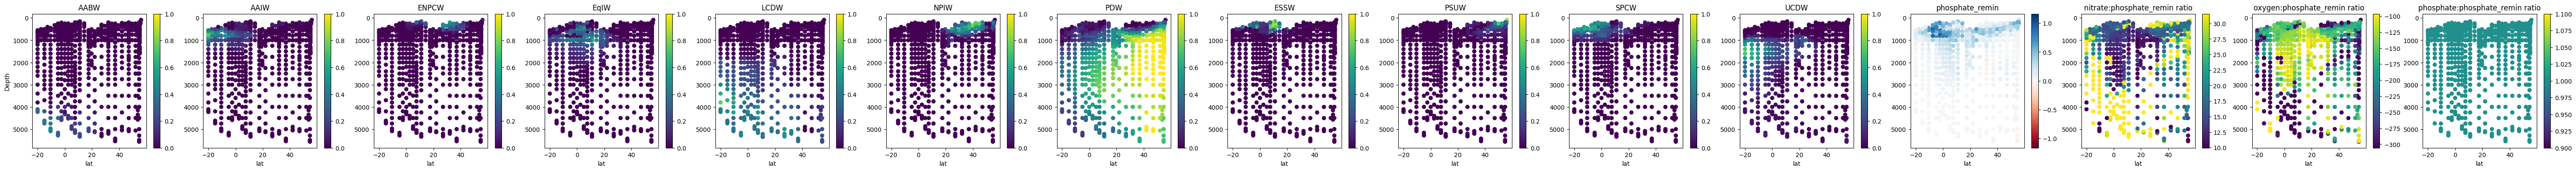

std


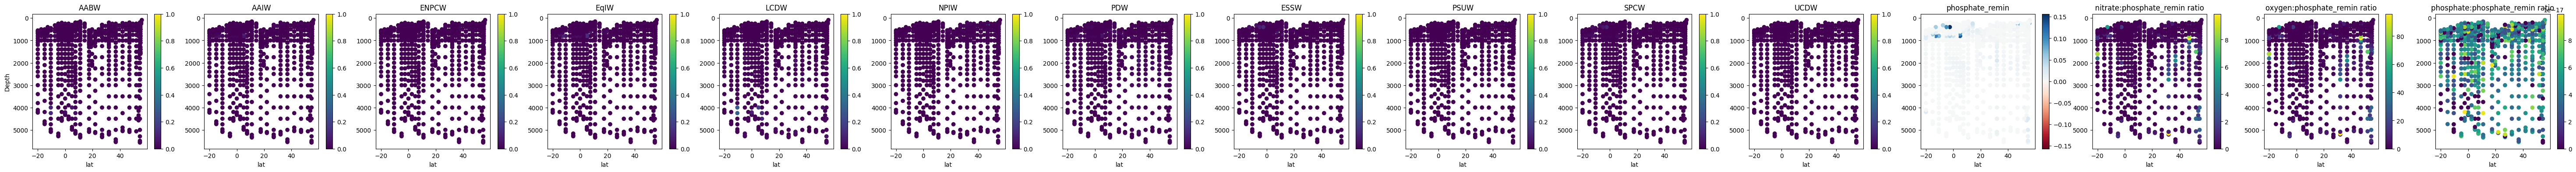

In [13]:
#plot the solutions - note that these solutions are just the ones output
# by the OMPA solver, and haven't been put through the second step of
# choosing the solution (out of several similar solutions) that is closest
# to the OCIM-derived steady-state fractions.
print("mean")
pyompa.plot_ompasoln_endmember_fractions(ompa_soln=mean_skeleton,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth",
                                  group_endmembers=True)
print("std")
pyompa.plot_ompasoln_endmember_fractions(ompa_soln=std_skeleton,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth",
                                  group_endmembers=True)


mean


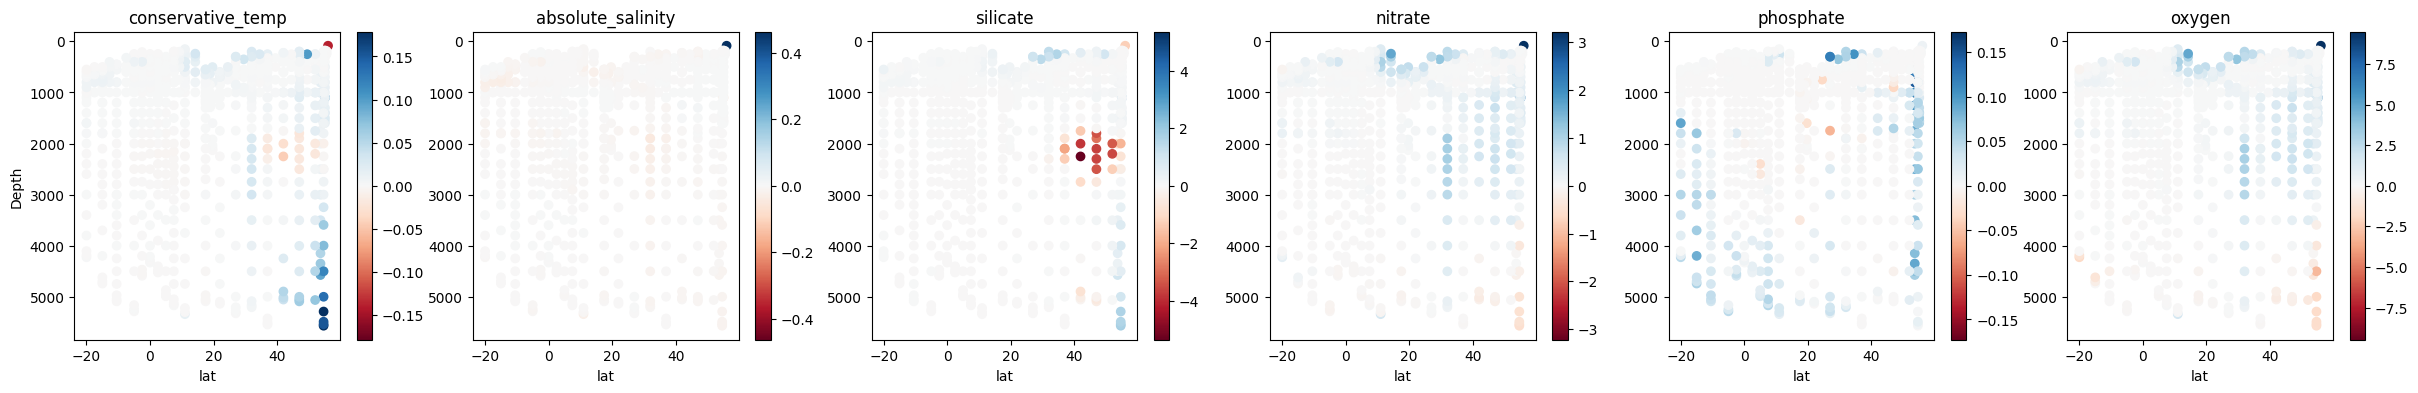

std


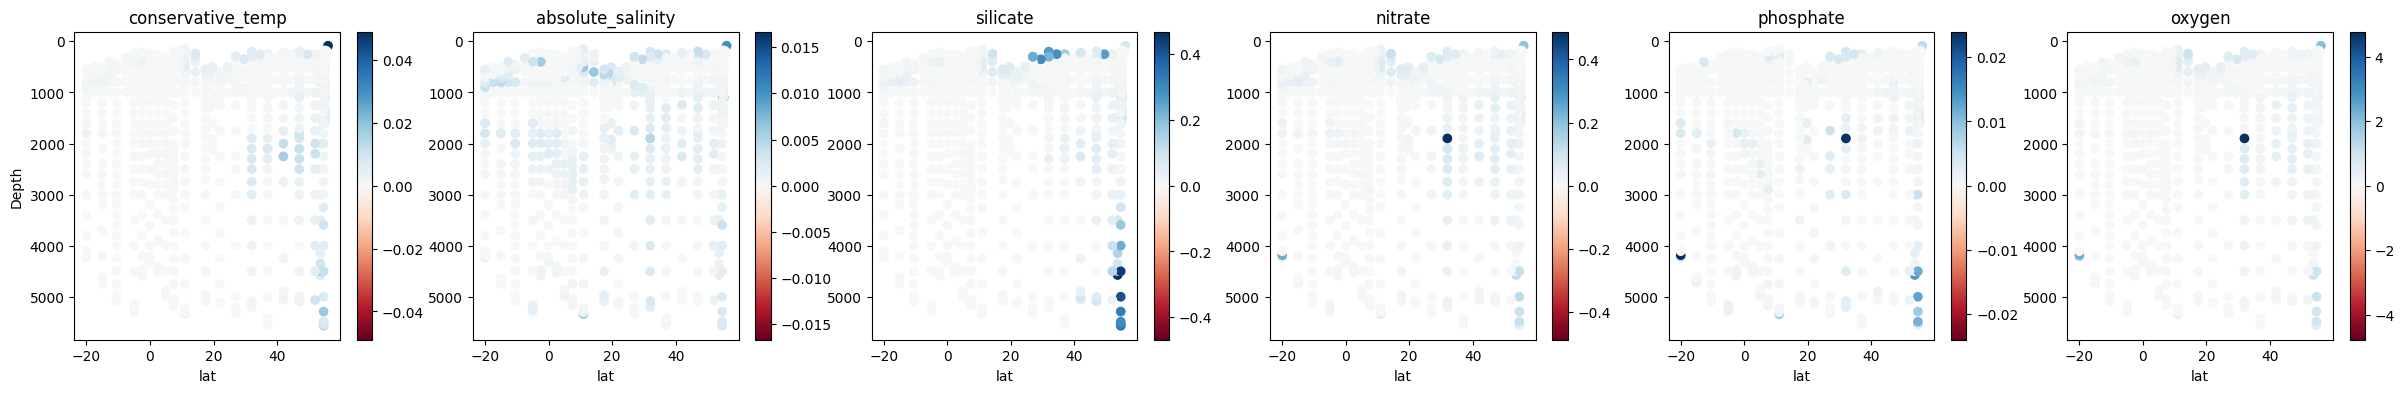

In [14]:
xaxis_colname="lat"
yaxis_colname="Depth"
flip_y=True

print("mean")
pyompa.plotting.plot_residuals(
        param_residuals=mean_skeleton.param_residuals,
        param_names=mean_skeleton.param_names,
        xaxis_vals=mean_skeleton.obs_df[xaxis_colname],
        xaxis_label=xaxis_colname,
        yaxis_vals=mean_skeleton.obs_df[yaxis_colname],
        yaxis_label=yaxis_colname, flip_y=flip_y,
        perobs_weighted_resid_sq=None)

print("std")
pyompa.plotting.plot_residuals(
        param_residuals=std_skeleton.param_residuals,
        param_names=mean_skeleton.param_names,
        xaxis_vals=mean_skeleton.obs_df[xaxis_colname],
        xaxis_label=xaxis_colname,
        yaxis_vals=mean_skeleton.obs_df[yaxis_colname],
        yaxis_label=yaxis_colname, flip_y=flip_y,
        perobs_weighted_resid_sq=None)

In [15]:
###uncomment below to export csv with senstivity analysis info###

ORIG_COLS_TO_INCLUDE = ["lat", "lon", "Depth", "CTD pressure", "stnnbr", "geotrc_ID", "sigma0"]
mean_skeleton.export_to_csv(
    csv_output_name="mean_skeleton.csv",
    orig_cols_to_include=ORIG_COLS_TO_INCLUDE)
std_skeleton.export_to_csv(
    csv_output_name="std_skeleton.csv",
    orig_cols_to_include=ORIG_COLS_TO_INCLUDE)

writing to mean_skeleton.csv
writing to std_skeleton.csv
